# Project 2: Ames Housing data




   #### by Awab Idris

***

## 1) Load packages and data.

In [113]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

np.random.seed(42)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [114]:
train = pd.read_csv("./datasets/train.csv")

In [115]:
kaggle = pd.read_csv("./datasets/test.csv")

***

## 2) Cleaning the data and  EDA.

#### For the training data

In [116]:
# Checking the training data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [117]:
# Checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

#### All these assumptions based on the data discription

In [118]:
# filling the null values in "Lot Frontage" column with the mean value of the column because logically every house must
# have an access to a street
train["Lot Frontage"].fillna(train["Lot Frontage"].mean, inplace=True)

In [119]:
# filling the null values in "Alley" column with "No access" because i'm assuming they don't have an alley
train["Alley"].fillna("No access",inplace=True)

In [120]:
# filling the 22 null values in "Mas Vnr Type" column with "None" because i'm assuming they are not classified yet
train["Mas Vnr Type"].fillna("None",inplace=True)

In [121]:
# filling the 22 null values in "Mas Vnr Area" column with 0 because i'm assuming they are the same ones from
# "Mas Vnr Type" column
train["Mas Vnr Area"].fillna(0,inplace=True)

In [122]:
# filling the 55 null values in "Bsmt Qual" column with "No basement" because i'm assuming they don't have a basement
train["Bsmt Qual"].fillna("No basement",inplace=True)

In [123]:
# filling the 55 null values in "Bsmt Cond" column with "No basement" because i'm assuming they are the same ones
# from the "Bsmt Qual" column 
train["Bsmt Cond"].fillna("No basement",inplace=True)

In [124]:
# filling the null values in "Bsmt Exposure" column with "No basement" because i'm assuming they don't have a basement
train["Bsmt Exposure"].fillna("No basement",inplace=True)

In [125]:
# filling the null values in "BsmtFin Type 1" column with "No basement" because i'm assuming they don't have a basement
train["BsmtFin Type 1"].fillna("No basement",inplace=True)

In [126]:
# filling the only null value in "BsmtFin SF 1" column with 0 because i'm assuming they don't have a basement
train["BsmtFin SF 1"].fillna(0,inplace=True)

In [127]:
# filling the null values in "BsmtFin Type 2" column with "No basement" because i'm assuming they don't have a basement
train["BsmtFin Type 2"].fillna("No basement",inplace=True)

In [128]:
# filling the only null value in "BsmtFin SF 2" column with 0 because i'm assuming they don't have a basement
train["BsmtFin SF 2"].fillna(0,inplace=True)

In [129]:
# filling the only null value in "Bsmt Unf SF" column with 0 because i'm assuming they don't have a basement
train["Bsmt Unf SF"].fillna(0,inplace=True)

In [130]:
# filling the only null value in "Total Bsmt SF" column with 0 because i'm assuming they don't have a basement
train["Total Bsmt SF"].fillna(0,inplace=True)

In [131]:
# filling the null values in "Bsmt Full Bath" column with 0 because i'm assuming they don't have a basement
train["Bsmt Full Bath"].fillna(0,inplace=True)

In [132]:
# filling the null values in "Bsmt Half Bath" column with 0 because i'm assuming they don't have a basement
train["Bsmt Half Bath"].fillna(0,inplace=True)

In [133]:
# filling the null values in "Fireplace Qu" column with "No fireplace" because i'm assuming they don't have a fireplace
train["Fireplace Qu"].fillna("No fireplace",inplace=True)

In [134]:
# filling the null values in "Garage Type" column with "No garage" because i'm assuming they don't have a garage
train["Garage Type"].fillna("No garage",inplace=True)

In [135]:
# filling the null values in "Garage Yr Blt" column with 0 because i'm assuming they don't have a garage
train["Garage Yr Blt"].fillna(0,inplace=True)

In [136]:
# filling the null values in "Garage Finish" column with "No garage" because i'm assuming they don't have a garage
train["Garage Finish"].fillna("No garage",inplace=True)

In [137]:
# filling the null values in "Garage Cars" column with 0 because i'm assuming they don't have a garage
train["Garage Cars"].fillna(0,inplace=True)

In [138]:
# filling the null values in "Garage Area" column with 0 because i'm assuming they don't have a garage
train["Garage Area"].fillna(0,inplace=True)

In [139]:
# filling the null values in "Garage Qual" column with "No garage" because i'm assuming they don't have a garage
train["Garage Qual"].fillna("No garage",inplace=True)

In [140]:
# filling the null values in "Garage Cond" column with "No garage" because i'm assuming they don't have a garage
train["Garage Cond"].fillna("No garage",inplace=True)

In [141]:
# filling the null values in "Pool QC" column with "No pool" because i'm assuming they don't have a pool
train["Pool QC"].fillna("No pool",inplace=True)

In [142]:
# filling the null values in "Fence" column with "No fence" because i'm assuming they don't have a fence
train["Fence"].fillna("No fence",inplace=True)

In [143]:
# filling the null values in "Misc Feature" column with "None" because i'm assuming they don't have a miscellaneous feature
train["Misc Feature"].fillna("None",inplace=True)

In [216]:
# Checking if there is still null values
train.isnull().sum().sum()

0

#### For the kaggle data

In [145]:
# Checking the training data
kaggle.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [146]:
# Checking for null values
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

#### We have to do the EDA on the kaggle data

In [147]:
# filling the null values in "Lot Frontage" column with the mean value of the column because logically every house must
# have an access to a street
kaggle["Lot Frontage"].fillna(kaggle["Lot Frontage"].mean, inplace=True)

In [148]:
# filling the null values in "Alley" column with "No access" because i'm assuming they don't have an alley
kaggle["Alley"].fillna("No access",inplace=True)

In [149]:
# filling the 22 null values in "Mas Vnr Type" column with "None" because i'm assuming they are not classified yet
kaggle["Mas Vnr Type"].fillna("None",inplace=True)

In [150]:
# filling the 22 null values in "Mas Vnr Area" column with 0 because i'm assuming they are the same ones from
# "Mas Vnr Type" column
kaggle["Mas Vnr Area"].fillna(0,inplace=True)

In [151]:
# filling the 55 null values in "Bsmt Qual" column with "No basement" because i'm assuming they don't have a basement
kaggle["Bsmt Qual"].fillna("No basement",inplace=True)

In [152]:
# filling the 55 null values in "Bsmt Cond" column with "No basement" because i'm assuming they are the same ones
# from the "Bsmt Qual" column 
kaggle["Bsmt Cond"].fillna("No basement",inplace=True)

In [153]:
# filling the null values in "Bsmt Exposure" column with "No basement" because i'm assuming they don't have a basement
kaggle["Bsmt Exposure"].fillna("No basement",inplace=True)

In [154]:
# filling the null values in "BsmtFin Type 1" column with "No basement" because i'm assuming they don't have a basement
kaggle["BsmtFin Type 1"].fillna("No basement",inplace=True)

In [155]:
# filling the only null value in "BsmtFin SF 1" column with 0 because i'm assuming they don't have a basement
kaggle["BsmtFin SF 1"].fillna(0,inplace=True)

In [156]:
# filling the null values in "BsmtFin Type 2" column with "No basement" because i'm assuming they don't have a basement
kaggle["BsmtFin Type 2"].fillna("No basement",inplace=True)

In [157]:
# filling the only null value in "BsmtFin SF 2" column with 0 because i'm assuming they don't have a basement
kaggle["BsmtFin SF 2"].fillna(0,inplace=True)

In [158]:
# filling the only null value in "Bsmt Unf SF" column with 0 because i'm assuming they don't have a basement
kaggle["Bsmt Unf SF"].fillna(0,inplace=True)

In [159]:
# filling the only null value in "Total Bsmt SF" column with 0 because i'm assuming they don't have a basement
kaggle["Total Bsmt SF"].fillna(0,inplace=True)

In [160]:
# filling the null values in "Bsmt Full Bath" column with 0 because i'm assuming they don't have a basement
kaggle["Bsmt Full Bath"].fillna(0,inplace=True)

In [161]:
# filling the null values in "Bsmt Half Bath" column with 0 because i'm assuming they don't have a basement
kaggle["Bsmt Half Bath"].fillna(0,inplace=True)

In [162]:
# filling the only null value in "Electrical" column with "Mix" because it's the only value from the data discription
# that's not there
kaggle["Electrical"].fillna("Mix",inplace=True)

In [163]:
# filling the null values in "Fireplace Qu" column with "No fireplace" because i'm assuming they don't have a fireplace
kaggle["Fireplace Qu"].fillna("No fireplace",inplace=True)

In [164]:
# filling the null values in "Garage Type" column with "No garage" because i'm assuming they don't have a garage
kaggle["Garage Type"].fillna("No garage",inplace=True)

In [165]:
# filling the null values in "Garage Yr Blt" column with 0 because i'm assuming they don't have a garage
kaggle["Garage Yr Blt"].fillna(0,inplace=True)

In [166]:
# filling the null values in "Garage Finish" column with "No garage" because i'm assuming they don't have a garage
kaggle["Garage Finish"].fillna("No garage",inplace=True)

In [167]:
# filling the null values in "Garage Cars" column with 0 because i'm assuming they don't have a garage
kaggle["Garage Cars"].fillna(0,inplace=True)

In [168]:
# filling the null values in "Garage Area" column with 0 because i'm assuming they don't have a garage
kaggle["Garage Area"].fillna(0,inplace=True)

In [169]:
# filling the null values in "Garage Qual" column with "No garage" because i'm assuming they don't have a garage
kaggle["Garage Qual"].fillna("No garage",inplace=True)

In [170]:
# filling the null values in "Garage Cond" column with "No garage" because i'm assuming they don't have a garage
kaggle["Garage Cond"].fillna("No garage",inplace=True)

In [171]:
# filling the null values in "Pool QC" column with "No pool" because i'm assuming they don't have a pool
kaggle["Pool QC"].fillna("No pool",inplace=True)

In [172]:
# filling the null values in "Fence" column with "No fence" because i'm assuming they don't have a fence
kaggle["Fence"].fillna("No fence",inplace=True)

In [173]:
# filling the null values in "Misc Feature" column with "None" because i'm assuming they don't have a miscellaneous feature
kaggle["Misc Feature"].fillna("None",inplace=True)

In [174]:
# Checking if there is stiil null values
kaggle.isnull().sum().sum()

0

***

## 3) Examine the data and finding the best predictors

In [175]:
# Checking the correlation
corr = train.corr()


In [176]:
# Checking the orrelation columns
corr.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [177]:
# Checking the correlation for "SalePrice"
corr[["SalePrice"]]

,SalePrice
Id,-0.051398
PID,-0.255052
MS SubClass,-0.087335
Lot Area,0.296566
Overall Qual,0.800207
Overall Cond,-0.097019
Year Built,0.571849
Year Remod/Add,0.550370
Mas Vnr Area,0.503579
BsmtFin SF 1,0.423856


In [178]:
# From the correlation you can tell these columns are good predictors, I removed the first 2 columns beacause 
# they are irrelevant
cols = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold']

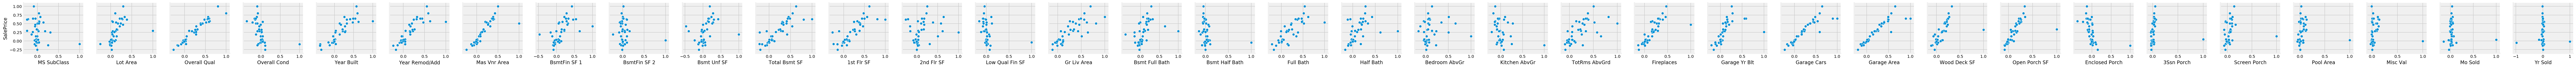

In [179]:
#  Plotting the selescted columns with the "SalesPrice" column
sns.pairplot(corr, x_vars=['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold'], y_vars=['SalePrice']
       )

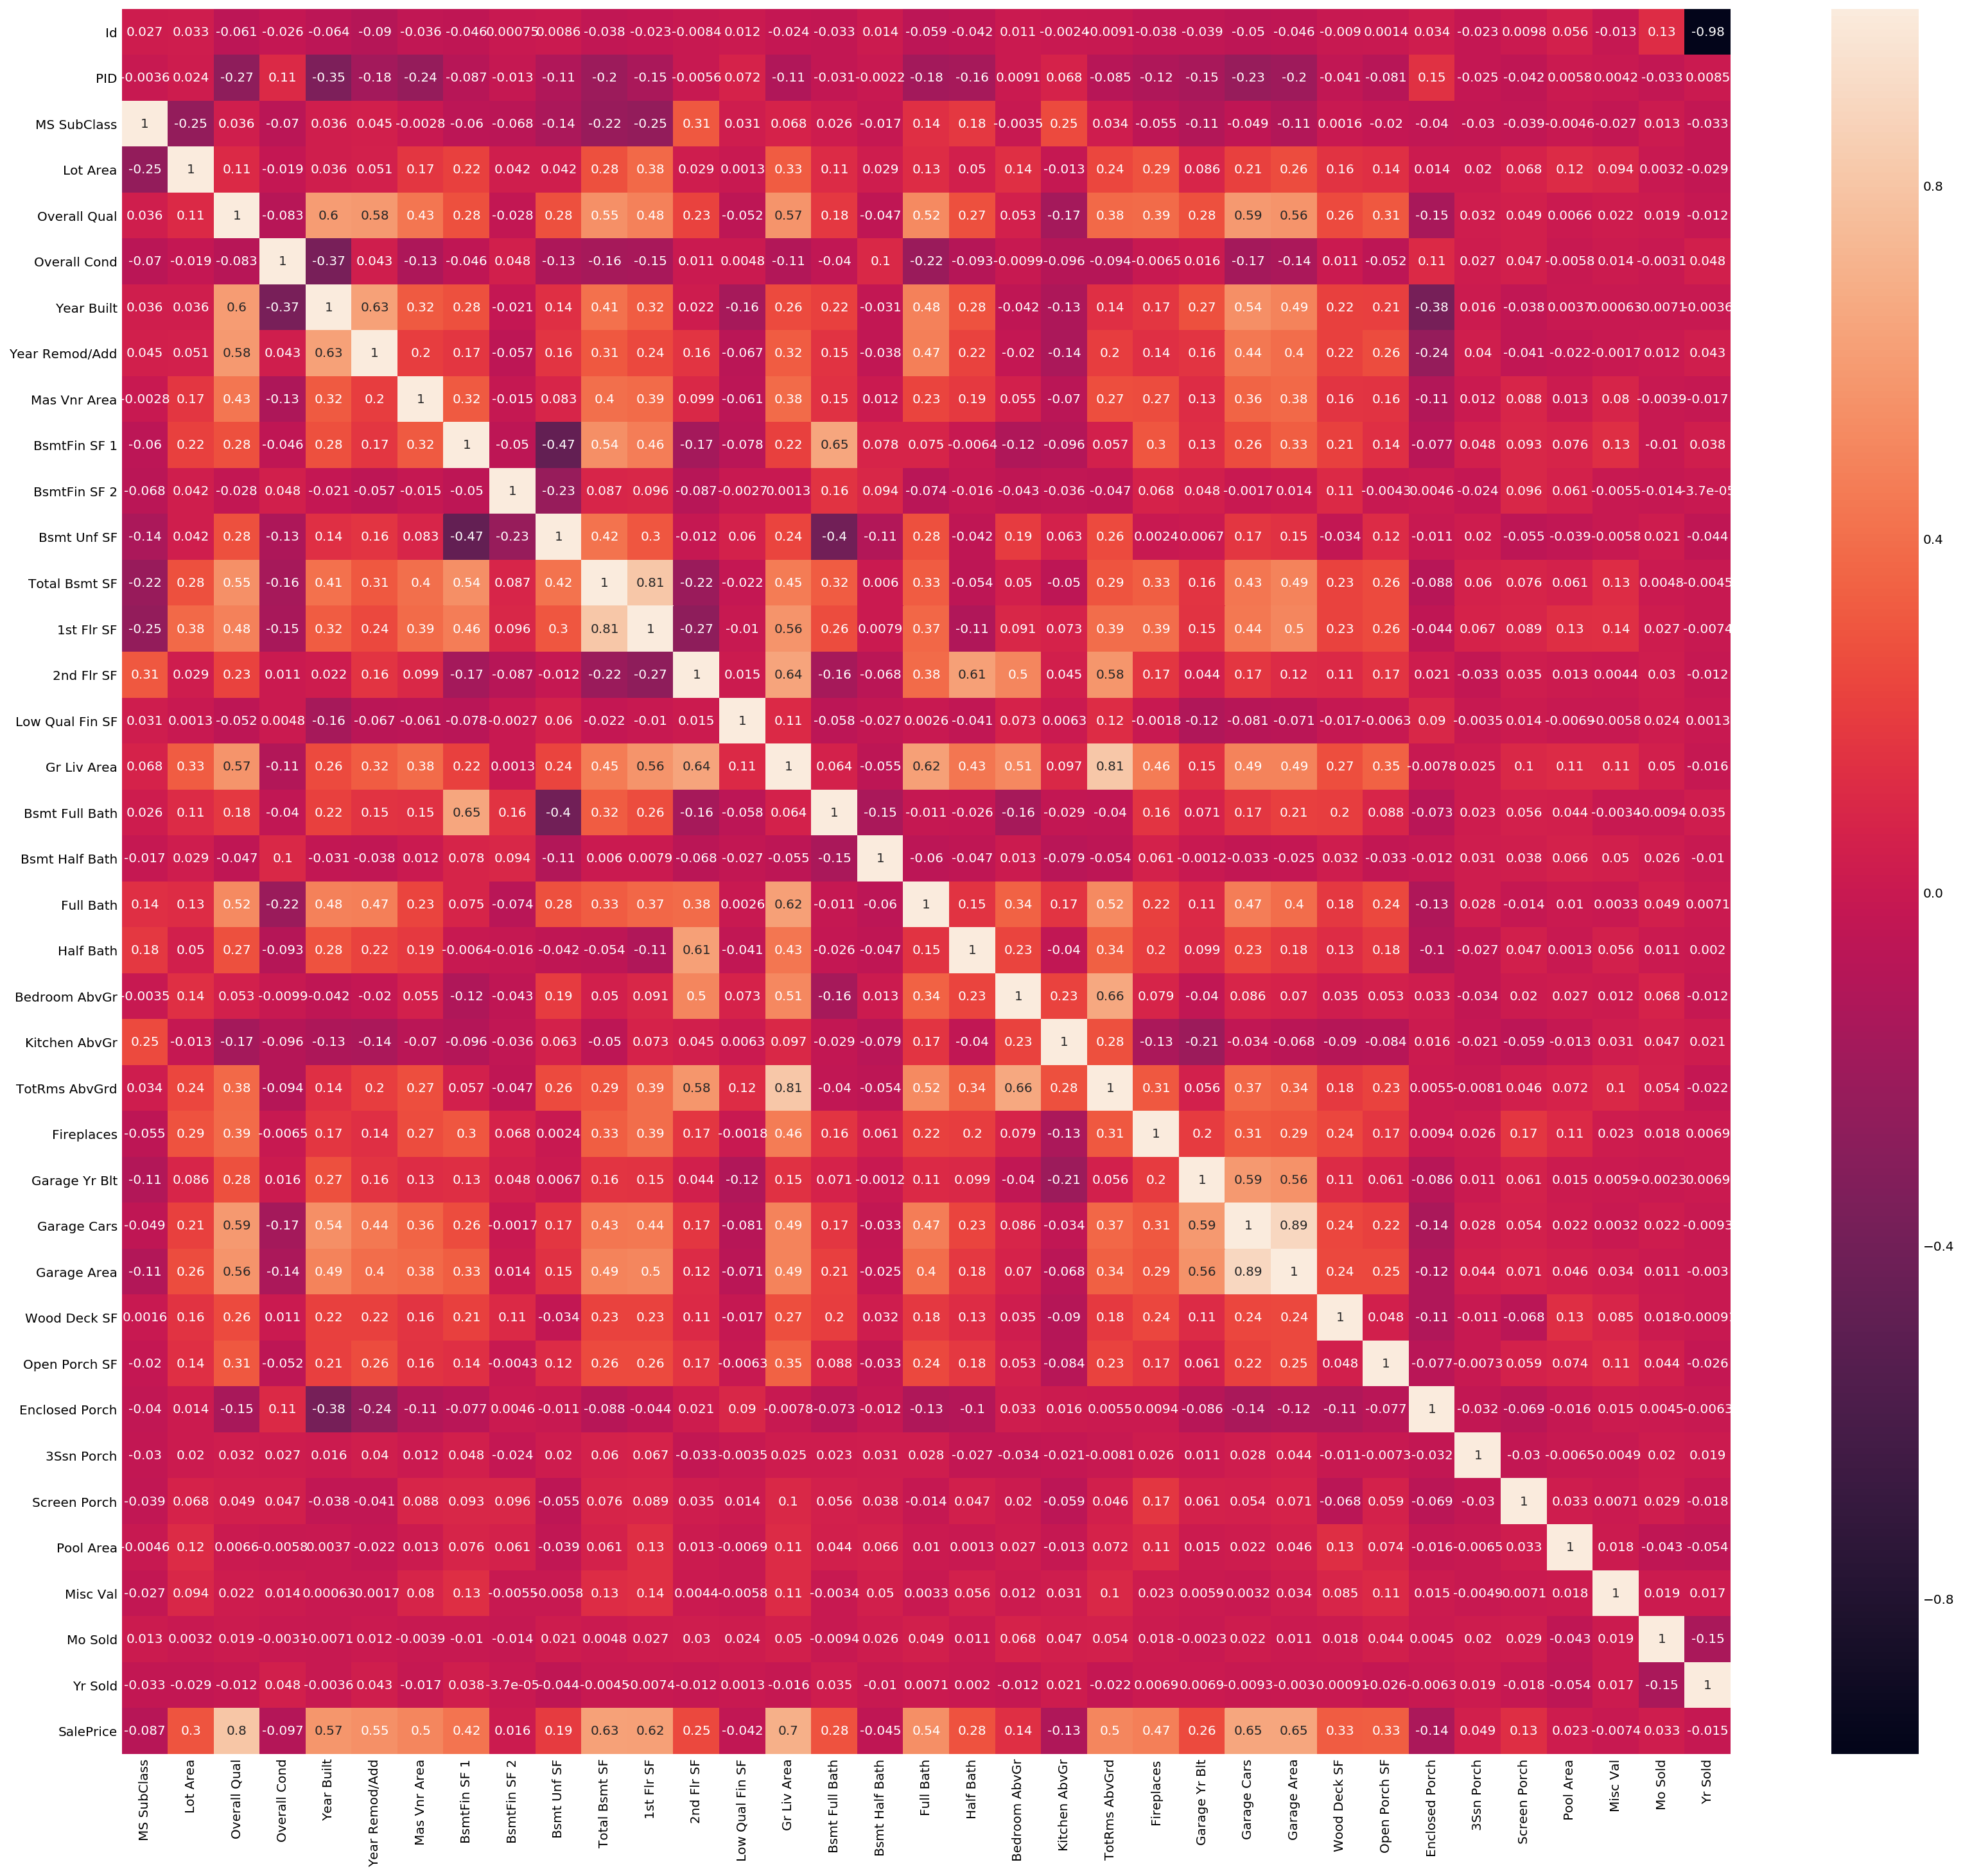

In [180]:
# Plotting the correlation map
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr[cols], annot=True)

## 4) Feature engineering

In [181]:
# adding the "Neighborhood" column to X and defining y
cols = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold','Neighborhood']

In [182]:
# adding the "Neighborhood" column to X and defining y
X = train[cols]

y = train["SalePrice"]

kaggle = kaggle[cols]

In [183]:
#  Creating dummies for the "Neighbourhood" column
X = pd.get_dummies(X, columns=['Neighborhood'])
kaggle = pd.get_dummies(kaggle, columns=['Neighborhood'])

In [185]:
# Checking column mismatch here: - Ben
X.shape




(2051, 63)

In [186]:
kaggle.shape

(879, 61)

In [189]:
# Fixing the diffrence of shapes between "kaggle" and "X"
[col for col in X.columns if col not in kaggle.columns]

['Neighborhood_GrnHill', 'Neighborhood_Landmrk']

In [190]:
[col for col in kaggle.columns if col not in X.columns]

[]

In [191]:
kaggle['Neighborhood_GrnHill'] = 0
kaggle['Neighborhood_Landmrk'] = 0


In [194]:
kaggle = kaggle[X.columns]

In [195]:
kaggle.columns.all() == X.columns.all()

True

In [196]:
# Applying the Polynomial Features
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pf = pf.fit(X)
X = pf.transform(X)

In [197]:
# Applying the Polynomial Features on the kaggle data
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pf = pf.fit(kaggle)
kaggle = pf.transform(kaggle)

***

## 5) standardization the data

In [198]:
# Standarization the data to make it all in one scale
ss = StandardScaler()
X = ss.fit_transform(X)

## 6) Train/Test/Split

In [199]:
# Splitting our data to train/test with 70:30 ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 7) Modeling & Evaluating

## 7.1) Linear Regression 

In [76]:
# Applying the Linear Regression model and evaluating the results using cross validation 
# for the training and testing data
lr = LinearRegression()
scores = cross_val_score(lr, X_train,y_train, cv=2)
print(scores)
print(np.mean(scores))

[-8.27482900e+18 -5.40859797e+18 -2.56097655e+19 -4.29929566e+17
 -3.03471203e+19]
-1.4014048475429892e+19


In [77]:
scores = cross_val_score(lr, X_test,y_test, cv=2)
print(scores)
print(np.mean(scores))

[ 0.24142425  0.05212135 -0.18335971 -0.75369341 -0.47885124]
-0.2244717530980321


In [78]:
# The Linear Regression model performs really bad on both data because the model is overfit

## 7.2) Ridge 

In [79]:
# Applying the Ridge model and evaluating the results using cross validation 
# for the training and testing data

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=2)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

3292.9712550971512


In [80]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=2)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.89222807 0.87220798 0.90921251 0.82529535 0.61163131]
0.8221150435960439


In [81]:
ridge_scores = cross_val_score(ridge, X_test, y_test, cv=2)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.86529613 0.92713819 0.9000054  0.84779396 0.89643042]
0.8873328206271045


In [82]:
# The Ridge model performs good on both data

## 7.3) lasso

In [200]:
# Manually engineering some alpha values - Ben
alphas = np.logspace(1, 3.5, 25)
alphas

array([  10.        ,   12.710618  ,   16.15598098,   20.53525026,
         26.10157216,   33.17671128,   42.16965034,   53.60023165,
         68.12920691,   86.59643234,  110.06941713,  139.90503141,
        177.827941  ,  226.03030271,  287.29848334,  365.17412725,
        464.15888336,  589.97462559,  749.89420933,  953.16188323,
       1211.52765863, 1539.92652606, 1957.34178149, 2487.90236724,
       3162.27766017])

In [201]:
# Applying the Lasso model and evaluating the results using cross validation 
# for the training and testing data

optimal_lasso = LassoCV(alphas=alphas, cv=3, verbose=0)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)


/Users/awabidris/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


464.1588833612782


In [202]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=2)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.90664088 0.69122802]
0.7989344489927157


In [203]:
lasso_scores = cross_val_score(lasso, X_test, y_test, cv=2)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.89196868 0.89710145]
0.8945350668351089


In [ ]:
# The Lasso model performs good even better than the Ridge model on the test data

## 7.4) Elastic Net

In [86]:
# Applying the Elastin Net model and evaluating the results using cross validation 
# for the training and testing data

l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=2,
                            verbose=0)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

70.50094331607683
0.9587500000000001


In [87]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=2)

print(enet_scores)
print(np.mean(enet_scores))

[0.89138782 0.87206534 0.90978094 0.82506042 0.61313226]
0.822285357003788


In [88]:
enet_scores = cross_val_score(enet, X_test, y_test, cv=2)

print(enet_scores)
print(np.mean(enet_scores))

[0.88152281 0.94414062 0.90804272 0.86346695 0.90088908]
0.8996124348688245


In [ ]:
# The Elastic Net model performs the same as Lasso

 ***


## 8) Predicting the price

In [204]:
# Standarizing the kaggle data
kaggle = ss.transform(kaggle)

In [205]:
# checking the shapes for the last time
kaggle.shape

(879, 2016)

In [206]:
X_train.shape

(1435, 2016)

In [207]:
# Fitting the lasso model and predicting the price

lasso = lasso.fit(X_train, y_train)
pred = lasso.predict(kaggle)

In [211]:
Id = pd.read_csv("./datasets/test.csv")["Id"]

In [214]:
#  Saving the data into a csv file
predictions = pd.DataFrame({'Id':Id, 'SalePrice':pred})
# predictions.to_csv('Submission.csv', index=False)
